<a href="https://colab.research.google.com/github/ideepankarsharma2003/Colab-Tutorials/blob/RNN/ShakespearePoemGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SHAKESPEARE POEM GENERATION**

In [ ]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/RNN/Poem-Generation")

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/RNN/Poem-Generation'

In [ ]:
!ls

images	__pycache__			 shakespeare.txt
models	ShakespearePoemGeneration.ipynb  shakespeare_utils.py


In [ ]:
# !cat shakespeare.txt 
!head -19 shakespeare.txt 

THE SONNETS

by William Shakespeare

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And tender churl mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.



### IMPORTING PACKAGES

In [ ]:
from __future__ import print_function
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import get_file
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import random
import sys
import io

In [ ]:
def build_data(text, Tx = 40, stride = 3):
    X = []
    Y = []

    for i in range(0, len(text) - Tx, stride):
        X.append(text[i: i + Tx])
        Y.append(text[i + Tx])
    
    print('number of training examples:', len(X))
    
    return X, Y

## VECTORIZATION 
to make 1-hot vectors

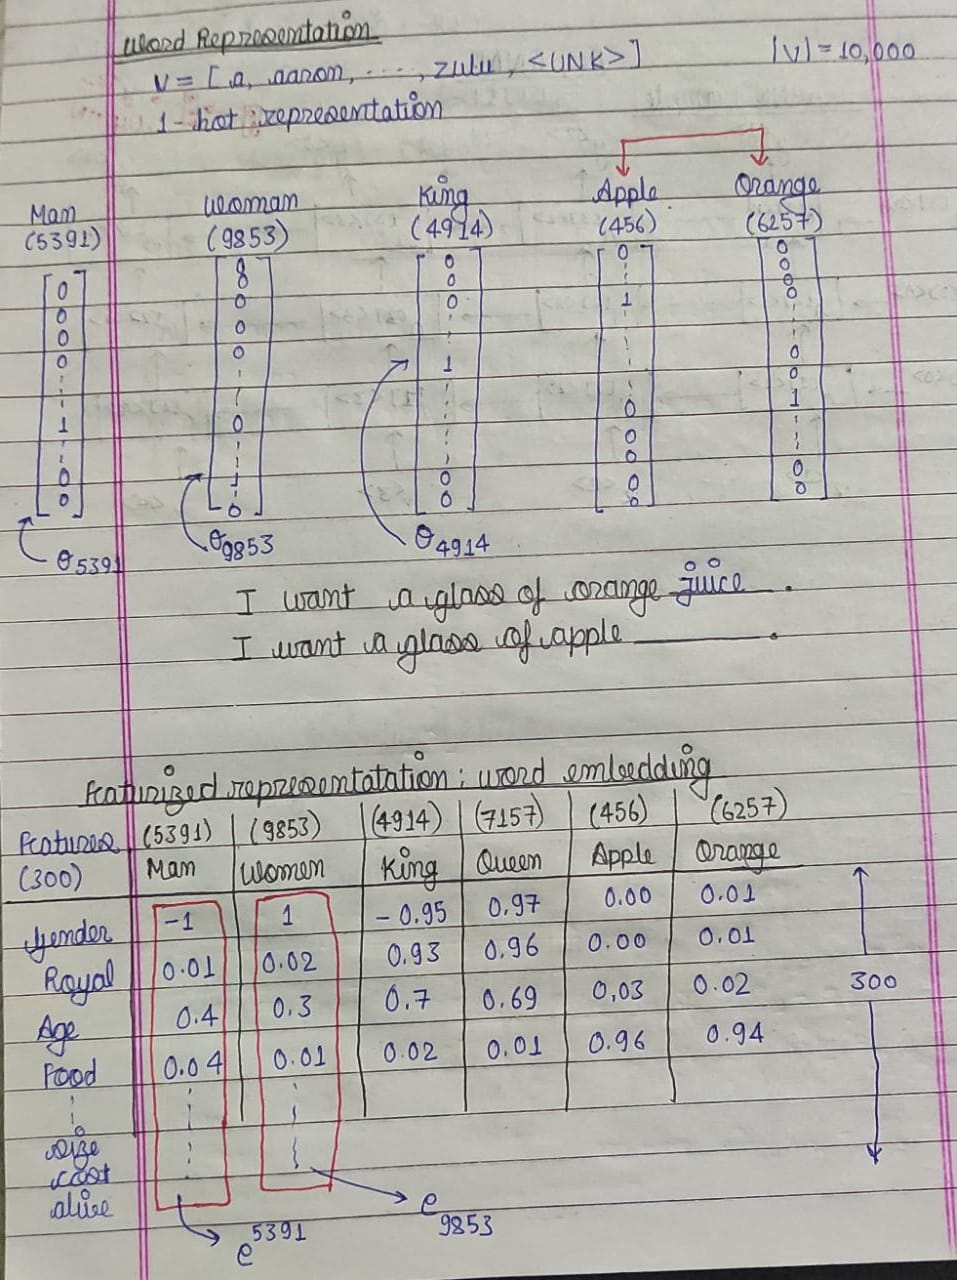

In [ ]:
def vectorization(X, Y, n_x, char_indices, Tx = 40):
    m = len(X)
    x = np.zeros((m, Tx, n_x), dtype=np.bool)
    y = np.zeros((m, n_x), dtype=np.bool)
    for i, sentence in enumerate(X):
        for t, char in enumerate(sentence):
            x[i, t, char_indices[char]] = 1
        y[i, char_indices[Y[i]]] = 1
        
    return x, y 

## SAMPLE
To sample the index from probablities


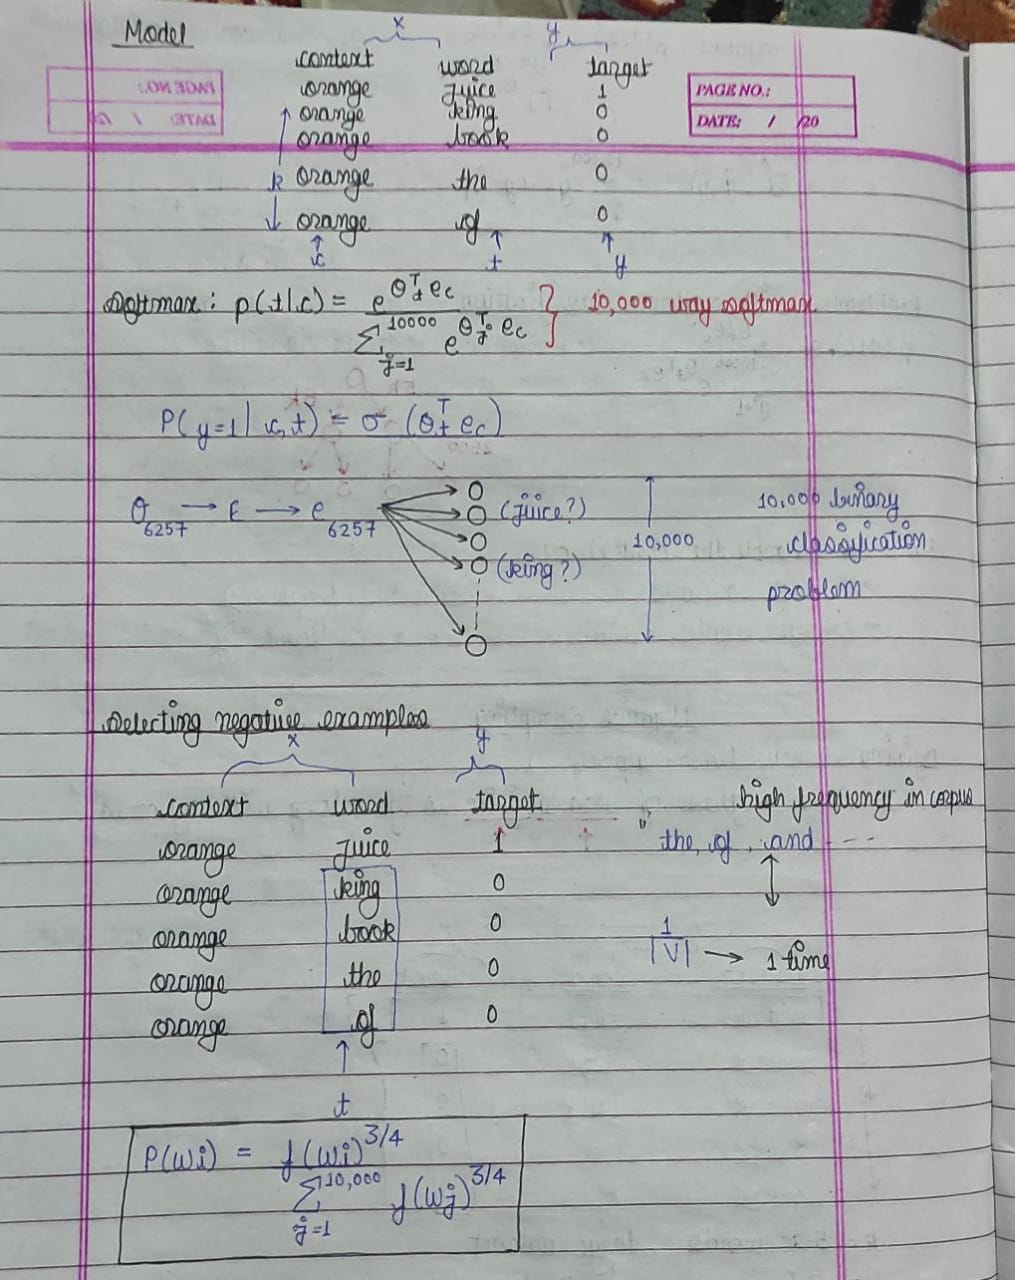

In [ ]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    out = np.random.choice(range(len(chars)), p = probas.ravel())
    return out
    #return np.argmax(probas)

### LOADING MODEL WITH PRETRAINED WEIGHTS ON 1000 EPOCHS

In [ ]:
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    None
    #start_index = random.randint(0, len(text) - Tx - 1)
    
    #generated = ''
    #sentence = text[start_index: start_index + Tx]
    #sentence = '0'*Tx
    #usr_input = input("Write the beginning of your poem, the Shakespearian machine will complete it.")
    # zero pad the sentence to Tx characters.
    #sentence = ('{0:0>' + str(Tx) + '}').format(usr_input).lower()
    #generated += sentence
#
    #sys.stdout.write(usr_input)

    #for i in range(400):
"""
        #x_pred = np.zeros((1, Tx, len(chars)))

        for t, char in enumerate(sentence):
            if char != '0':
                x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature = 1.0)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
        
        if next_char == '\n':
            continue
        
    # Stop at the end of a line (4 lines)
    print()
 """   
print("Loading text data...")
text = io.open('shakespeare.txt', encoding='utf-8').read().lower()
#print('corpus length:', len(text))

Tx = 40
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))
#print('number of unique characters in the corpus:', len(chars))

print("Creating training set...")
X, Y = build_data(text, Tx, stride = 3)
print("Vectorizing training set...")
x, y = vectorization(X, Y, n_x = len(chars), char_indices = char_indices) 
print("Loading model...")
model = load_model('models/model_shakespeare_kiank_350_epoch.h5')


Loading text data...
Creating training set...
number of training examples: 31412
Vectorizing training set...
Loading model...


### GENERATING OUTPUT

In [ ]:
def generate_output():
    generated = ''
    #sentence = text[start_index: start_index + Tx]
    #sentence = '0'*Tx
    usr_input = input("Write the beginning of your poem, the Shakespeare machine will complete it. Your input is: ")
    # zero pad the sentence to Tx characters.
    sentence = ('{0:0>' + str(Tx) + '}').format(usr_input).lower()
    generated += usr_input 

    sys.stdout.write("\n\nHere is your poem: \n\n") 
    sys.stdout.write(usr_input)
    for i in range(400):

        x_pred = np.zeros((1, Tx, len(chars)))

        for t, char in enumerate(sentence):
            if char != '0':
                x_pred[0, t, char_indices[char]] = 1.

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature = 1.0)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()

        if next_char == '\n':
            continue

In [ ]:
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y, batch_size=128, epochs=5, callbacks=[print_callback])

Epoch 1/5
246/246 [==============================] - 91s 370ms/step - loss: 1.9001
Epoch 2/5
246/246 [==============================] - 88s 360ms/step - loss: 1.8601
Epoch 3/5
246/246 [==============================] - 89s 364ms/step - loss: 1.8272
Epoch 4/5
246/246 [==============================] - 88s 360ms/step - loss: 1.8081
Epoch 5/5
246/246 [==============================] - 87s 356ms/step - loss: 1.7880


In [ ]:
# Run this cell to try with different inputs without having to re-train the model 
generate_output()

Write the beginning of your poem, the Shakespeare machine will complete it. Your input is: I was dreaming


Here is your poem: 

I was dreaming,
you wine etry wallast my ifpoudy distate,
regess portlesing light it you thing to keed,
that i hact net with that which pathets dome,
that cem egperpy of my ta dess cals beright,
so shoulden as must to by oft with stats:
which nowtide, then of thy own thy dumoun
sum the bast hath minker not in be the wrealt:
thinc, as thy othen to dit bint don'st,
and leed for have acateawing so leads,
of bear l